- we have two types of scaling

    - Z score (Standarization)

    - Min Max scalar (Normalization)

**Z- Score**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
file=r"C:\Users\Shiva\Downloads\Visadataset.csv"
visa_df=pd.read_csv(file)


cat=visa_df.select_dtypes(include="object").columns
num=visa_df.select_dtypes(exclude="object").columns

In [ ]:
# step-1:take the pwage data
# step- 2: calculate mean of the data
# step-3: calculate std of the data
# step-4: Nr=data-mean(step1-step2)
# step-5: z_wage=Nr/std=step4/step3
# step-6: Create a new column visa_df['z_wage']=z_wage

In [5]:
pwage=visa_df["prevailing_wage"]
pwage_mean=pwage.mean()
pwage_std=pwage.std()

In [6]:
Nr=pwage-pwage_mean

In [8]:
Nr

0        -73863.611692
1          8969.835408
2         48541.045408
3          8978.215408
4         75451.575408
             ...      
25475      2636.755408
25476    204718.975408
25477     71843.035408
25478     11698.955408
25479     -3578.904592
Name: prevailing_wage, Length: 25480, dtype: float64

In [11]:
z_wage=Nr/pwage_std

In [12]:
z_wage

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: prevailing_wage, Length: 25480, dtype: float64

In [13]:
visa_df['z_wage']=z_wage

In [14]:
visa_df['z_wage']

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: z_wage, Length: 25480, dtype: float64

In [15]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504


In [16]:
visa_df[["prevailing_wage","z_wage"]]

,prevailing_wage,z_wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


{'whiskers': [<matplotlib.lines.Line2D at 0x1f4c19c2490>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4c19c2710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4c19c2350>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4c19c2990>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4c19c2ad0>],
 'means': []}

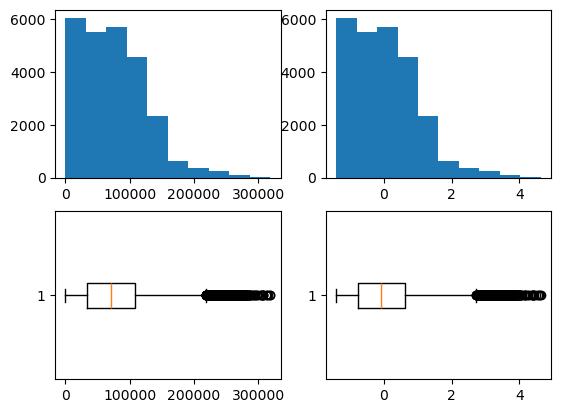

In [21]:


plt.subplot(2,2,1).hist(pwage)
plt.subplot(2,2,2).hist(z_wage)
plt.subplot(2,2,3).boxplot(pwage,vert=False)
plt.subplot(2,2,4).boxplot(z_wage,vert=False)

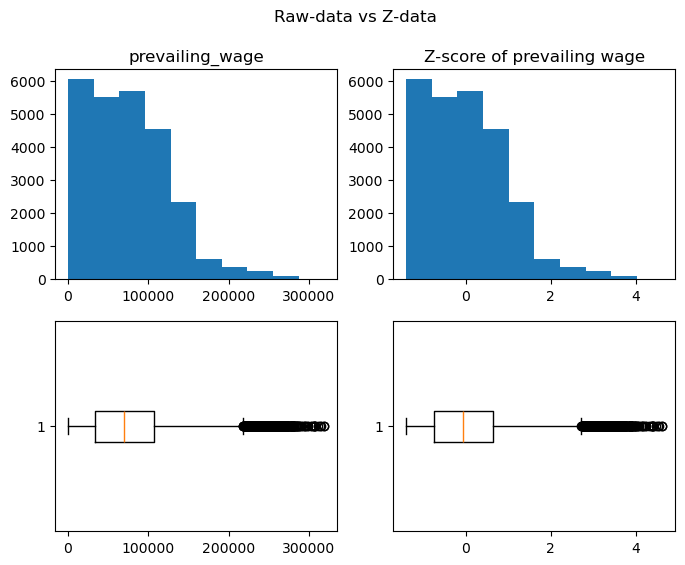

In [24]:
plt.figure(figsize=(8,6))
plt.suptitle("Raw-data vs Z-data")
plt.subplot(2,2,1).hist(pwage)
plt.title("prevailing_wage")
plt.subplot(2,2,2).hist(z_wage)
plt.title("Z-score of prevailing wage")
plt.subplot(2,2,3).boxplot(pwage,vert=False)
plt.subplot(2,2,4).boxplot(z_wage,vert=False)
plt.show()

**StandardScaler**

- sklearn

  - preprocessing

      - StandardScalar

In [26]:
from sklearn.preprocessing import StandardScaler
Ss=StandardScaler()

In [27]:
Ss.fit_transform(visa_df["prevailing_wage"])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [29]:
wage_ss=Ss.fit_transform(visa_df[["prevailing_wage"]])
visa_df["wage_ss"]=wage_ss

In [30]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504,0.221509


In [31]:
visa_df[["prevailing_wage","z_wage","wage_ss"]]

,prevailing_wage,z_wage,wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [33]:
visa_df["prevailing_wage"].reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [34]:
visa_df["prevailing_wage"].values

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [35]:
visa_df["prevailing_wage"].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

In [38]:
wage_ss1=Ss.fit_transform(visa_df["prevailing_wage"].values.reshape(-1,1))
wage_ss1

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**Min-Max Scaler**

In [ ]:
# step-1: read the data
#  step-2: calculate min
# step-3: caluculate max\
# step-4:Nr=step1-step2
# step-5:Dr=Step-3-Step-2
# step-6:Nr/Dr
# step-7:visa_df["wage_min_max"]=Nr/Dr

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file=r"C:\Users\Shiva\Downloads\Visadataset.csv"
visa_df=pd.read_csv(file)

pwage=visa_df["prevailing_wage"]
pwage_min=pwage.min()
pwage_max=pwage.max()
Nr=pwage-pwage_min
Dr=pwage_max-pwage_min
Nr/Dr

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

In [7]:
Nr=pwage-pwage_min
Nr

0           590.0662
1         83423.5133
2        122994.7233
3         83431.8933
4        149905.2533
            ...     
25475     77090.4333
25476    279172.6533
25477    146296.7133
25478     86152.6333
25479     70874.7733
Name: prevailing_wage, Length: 25480, dtype: float64

In [8]:
Dr=pwage_max-pwage_min
Dr

319208.13330000004

In [9]:
Nr/Dr

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

In [10]:
visa_df["wage_min_max"]=Nr/Dr
visa_df["wage_min_max"]

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: wage_min_max, Length: 25480, dtype: float64

In [11]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_min_max
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895


In [50]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

mms.fit_transform(visa_df["prevailing_wage"].values.reshape(-1,1))

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])